In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

pd.set_option('display.max_columns', 500)

In [2]:
sales = pd.read_csv("data/source/sales_train.csv")
sales["date"] = sales["date"].apply(lambda x: datetime.strptime(x, "%d.%m.%Y"))
display(sales.head(5))
sales.shape

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


(2935849, 6)

In [3]:
items = pd.read_csv("data/source/items.csv")
cats = pd.read_csv("data/source/item_categories.csv")

items = items.join(cats.set_index("item_category_id"), how="left", on="item_category_id")

items

,item_name,item_id,item_category_id,item_category_name
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Кино - DVD
1,!ABBYY FineReader 12 Professional Edition Full...,1,76,Программы - Для дома и офиса (Цифра)
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD
4,***КОРОБКА (СТЕКЛО) D,4,40,Кино - DVD
...,...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31,Игры PC - Цифра
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54,Книги - Цифра
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49,Книги - Методические материалы 1С
22168,Яйцо для Little Inu,22168,62,"Подарки - Гаджеты, роботы, спорт"


In [4]:
shops = pd.read_csv("data/source/shops.csv")

shops.head(5)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [5]:
# aggregate by month
sales_monthly = sales.groupby(["date_block_num", "shop_id", "item_id"]).agg({
    "item_cnt_day": ["sum", "min", "max"],
    "date": ["min", "max", "count"],
    "item_price": ["mean", "max", "min"]
}).reset_index()

# flatten column names an fill na
sales_monthly.columns = [c[0] if c[1] == "" else c[1] + "_" + c[0] for c in sales_monthly.columns]
sales_monthly = sales_monthly.fillna(0) # should only affect std of breakouts of count 1

# add item and shop metadata
sales_monthly = sales_monthly.join(items.set_index("item_id"), how="left", on="item_id")
sales_monthly = sales_monthly.join(shops.set_index("shop_id"), on="shop_id", how="left")

# replace min and max dates by their day of month
sales_monthly["min_date"] = sales_monthly.min_date.apply(lambda x: x.day)
sales_monthly["max_date"] = sales_monthly.max_date.apply(lambda x: x.day)

sales_monthly

,date_block_num,shop_id,item_id,sum_item_cnt_day,min_item_cnt_day,max_item_cnt_day,min_date,max_date,count_date,mean_item_price,max_item_price,min_item_price,item_name,item_category_id,item_category_name,shop_name
0,0,0,32,6.0,1.0,2.0,3,31,4,221.0,221.0,221.0,1+1,40,Кино - DVD,"!Якутск Орджоникидзе, 56 фран"
1,0,0,33,3.0,1.0,1.0,3,28,3,347.0,347.0,347.0,1+1 (BD),37,Кино - Blu-Ray,"!Якутск Орджоникидзе, 56 фран"
2,0,0,35,1.0,1.0,1.0,31,31,1,247.0,247.0,247.0,10 ЛЕТ СПУСТЯ,40,Кино - DVD,"!Якутск Орджоникидзе, 56 фран"
3,0,0,43,1.0,1.0,1.0,31,31,1,221.0,221.0,221.0,100 МИЛЛИОНОВ ЕВРО,40,Кино - DVD,"!Якутск Орджоникидзе, 56 фран"
4,0,0,51,2.0,1.0,1.0,13,31,2,128.5,130.0,127.0,100 лучших произведений классики (mp3-CD) (Dig...,57,Музыка - MP3,"!Якутск Орджоникидзе, 56 фран"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609119,33,59,22087,6.0,1.0,3.0,5,23,3,119.0,119.0,119.0,Элемент питания DURACELL LR03-BC2,83,Элементы питания,"Ярославль ТЦ ""Альтаир"""
1609120,33,59,22088,2.0,1.0,1.0,3,27,2,119.0,119.0,119.0,Элемент питания DURACELL LR06-BC2,83,Элементы питания,"Ярославль ТЦ ""Альтаир"""
1609121,33,59,22091,1.0,1.0,1.0,3,3,1,179.0,179.0,179.0,Элемент питания DURACELL TURBO LR 03 2*BL,83,Элементы питания,"Ярославль ТЦ ""Альтаир"""
1609122,33,59,22100,1.0,1.0,1.0,18,18,1,629.0,629.0,629.0,Энциклопедия Adventure Time,42,"Книги - Артбуки, энциклопедии","Ярославль ТЦ ""Альтаир"""


In [6]:
for col in ["sum_item_cnt_day", "min_item_cnt_day", "max_item_cnt_day",
           "min_date", "max_date", "count_date"]:
    sales_monthly[col] = sales_monthly[col].astype("Int16")
    
sales_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1609124 entries, 0 to 1609123
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   date_block_num      1609124 non-null  int64  
 1   shop_id             1609124 non-null  int64  
 2   item_id             1609124 non-null  int64  
 3   sum_item_cnt_day    1609124 non-null  Int16  
 4   min_item_cnt_day    1609124 non-null  Int16  
 5   max_item_cnt_day    1609124 non-null  Int16  
 6   min_date            1609124 non-null  Int16  
 7   max_date            1609124 non-null  Int16  
 8   count_date          1609124 non-null  Int16  
 9   mean_item_price     1609124 non-null  float64
 10  max_item_price      1609124 non-null  float64
 11  min_item_price      1609124 non-null  float64
 12  item_name           1609124 non-null  object 
 13  item_category_id    1609124 non-null  int64  
 14  item_category_name  1609124 non-null  object 
 15  shop_name      

In [7]:
sales_monthly.to_csv("data/processed/sales_monthly.csv", header=True, index=False)

In [8]:
def plot_series_monthly(shop_id, item_id):
    dateblock_range = list(range(34))
    
    series = sales_monthly.query(
        f"shop_id == {shop_id} and item_id == {item_id}"
    ).sort_values("date_block_num")

    fig, ax = plt.subplots(1, 1, figsize=(15, 5))
    
    a = [series[series.date_block_num == d].sum_item_cnt_day.values for d in dateblock_range]
    a = [x[0] if len(x) == 1 else 0 for x in a]
    
    ax.plot(
        dateblock_range, 
        a,
        marker="o", 
        linestyle="--"
    )
    
    for v in [9, 21, 33]:
        ax.axvline(v, color="gray", linestyle="--");

24 2136


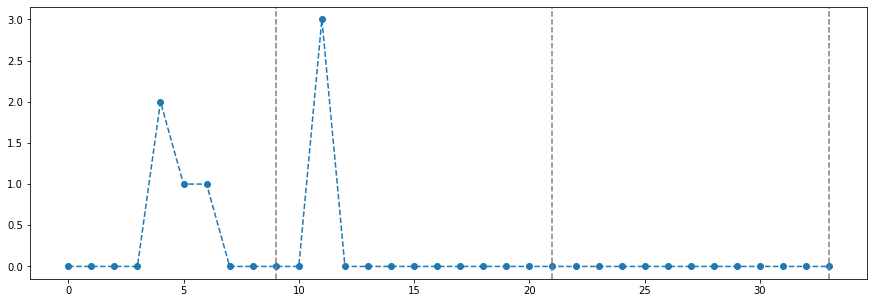

In [9]:
shop_id, item_id = tuple(sales_monthly.sample(n=1)[["shop_id", "item_id"]].values[0])

print(shop_id, item_id)

plot_series_monthly(shop_id, item_id)

In [10]:
sales_monthly.sort_values(by="sum_item_cnt_day", ascending=False)

,date_block_num,shop_id,item_id,sum_item_cnt_day,min_item_cnt_day,max_item_cnt_day,min_date,max_date,count_date,mean_item_price,max_item_price,min_item_price,item_name,item_category_id,item_category_name,shop_name
1582127,33,12,11373,2253,1,2169,1,29,19,382.224936,1451.000000,0.908714,Доставка до пункта выдачи (Boxberry),9,Доставка товара,Интернет-магазин ЧС
1574410,32,55,9249,1644,1,637,1,30,29,1506.993991,1702.825746,1500.000000,"Билет ""ИгроМир 2015"" - 3 октября 2015 (сайт) У...",8,Билеты (Цифра),Цифровой склад 1С-Онлайн
1552020,32,12,9248,1644,1,669,1,30,29,1508.318762,1692.526158,1500.000000,"Билет ""ИгроМир 2015"" - 3 октября 2015 (сайт) [...",80,Служебные - Билеты,Интернет-магазин ЧС
657943,11,31,20949,1305,18,81,1,31,31,4.998710,5.000000,4.960000,Фирменный пакет майка 1С Интерес белый (34*42)...,71,"Подарки - Сумки, Альбомы, Коврики д/мыши","Москва ТЦ ""Семеновский"""
1412964,27,55,3730,1242,28,231,14,30,17,1998.764706,1999.000000,1995.000000,"Grand Theft Auto V [PC, Цифровая версия]",31,Игры PC - Цифра,Цифровой склад 1С-Онлайн
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575694,10,12,3732,-4,-3,1,2,29,6,2534.000000,2599.000000,2469.000000,"Grand Theft Auto V [PS3, русские субтитры]",19,Игры - PS3,Интернет-магазин ЧС
1026259,19,12,11367,-5,-2,-1,4,12,3,291.666667,375.000000,250.000000,Доставка (Клео-Логистик),9,Доставка товара,Интернет-магазин ЧС
11047,0,12,1593,-6,-3,-1,10,26,3,1799.000000,1799.000000,1799.000000,"Assassin’s Creed 3. Join or Die Edition [PC, р...",29,Игры PC - Коллекционные издания,Интернет-магазин ЧС
11045,0,12,1590,-13,-6,-1,10,29,4,2599.000000,2599.000000,2599.000000,"Assassin’s Creed 3. Freedom Edition [PC, русск...",29,Игры PC - Коллекционные издания,Интернет-магазин ЧС


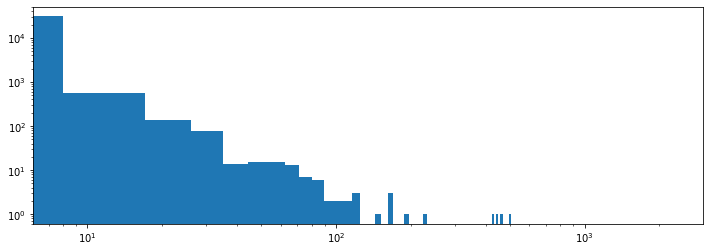

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

ax.hist(
    sales_monthly.query("date_block_num == 33")["sum_item_cnt_day"], bins=250
)
ax.set_xscale("log")
ax.set_yscale("log");

In [12]:
sales_monthly.sort_values(by=["item_id", "shop_id", "date_block_num"])

,date_block_num,shop_id,item_id,sum_item_cnt_day,min_item_cnt_day,max_item_cnt_day,min_date,max_date,count_date,mean_item_price,max_item_price,min_item_price,item_name,item_category_id,item_category_name,shop_name
1101022,20,54,0,1,1,1,1,1,1,58.0,58.0,58.0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,40,Кино - DVD,"Химки ТЦ ""Мега"""
877718,15,55,1,2,1,1,2,4,2,4490.0,4490.0,4490.0,!ABBYY FineReader 12 Professional Edition Full...,76,Программы - Для дома и офиса (Цифра),Цифровой склад 1С-Онлайн
1015412,18,55,1,1,1,1,6,6,1,4490.0,4490.0,4490.0,!ABBYY FineReader 12 Professional Edition Full...,76,Программы - Для дома и офиса (Цифра),Цифровой склад 1С-Онлайн
1061583,19,55,1,1,1,1,4,4,1,4490.0,4490.0,4490.0,!ABBYY FineReader 12 Professional Edition Full...,76,Программы - Для дома и офиса (Цифра),Цифровой склад 1С-Онлайн
1102844,20,55,1,1,1,1,11,11,1,4490.0,4490.0,4490.0,!ABBYY FineReader 12 Professional Edition Full...,76,Программы - Для дома и офиса (Цифра),Цифровой склад 1С-Онлайн
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473482,8,12,22168,1,1,1,13,13,1,799.0,799.0,799.0,Яйцо для Little Inu,62,"Подарки - Гаджеты, роботы, спорт",Интернет-магазин ЧС
79309,1,16,22168,1,1,1,17,17,1,799.0,799.0,799.0,Яйцо для Little Inu,62,"Подарки - Гаджеты, роботы, спорт","Коломна ТЦ ""Рио"""
107745,1,42,22168,1,1,1,2,2,1,799.0,799.0,799.0,Яйцо для Little Inu,62,"Подарки - Гаджеты, роботы, спорт","СПб ТК ""Невский Центр"""
167027,2,43,22168,1,1,1,8,8,1,798.5,798.5,798.5,Яйцо для Little Inu,62,"Подарки - Гаджеты, роботы, спорт","СПб ТК ""Сенная"""


In [20]:
sales_monthly_wide = sales_monthly.set_index([
    "shop_id",
    "item_id",
    "item_name",
    "item_category_id",
    "item_category_name",
    "shop_name",
    "date_block_num",
]).unstack()

sales_monthly_wide = sales_monthly_wide.reset_index().fillna(0)

sales_monthly_wide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424124 entries, 0 to 424123
Columns: 312 entries, ('shop_id', '') to ('min_item_price', 33)
dtypes: Int16(204), float64(102), int64(3), object(3)
memory usage: 597.0+ MB


In [22]:
sales_monthly_wide.columns = [
    c[0] if c[1] == '' else (
        c[0] + "_" + str(c[1])
    ).replace("day", "month") for c in sales_monthly_wide.columns
]

In [23]:
sales_monthly_wide

,shop_id,item_id,item_name,item_category_id,item_category_name,shop_name,sum_item_cnt_month_0,sum_item_cnt_month_1,sum_item_cnt_month_2,sum_item_cnt_month_3,sum_item_cnt_month_4,sum_item_cnt_month_5,sum_item_cnt_month_6,sum_item_cnt_month_7,sum_item_cnt_month_8,sum_item_cnt_month_9,sum_item_cnt_month_10,sum_item_cnt_month_11,sum_item_cnt_month_12,sum_item_cnt_month_13,sum_item_cnt_month_14,sum_item_cnt_month_15,sum_item_cnt_month_16,sum_item_cnt_month_17,sum_item_cnt_month_18,sum_item_cnt_month_19,sum_item_cnt_month_20,sum_item_cnt_month_21,sum_item_cnt_month_22,sum_item_cnt_month_23,sum_item_cnt_month_24,sum_item_cnt_month_25,sum_item_cnt_month_26,sum_item_cnt_month_27,sum_item_cnt_month_28,sum_item_cnt_month_29,sum_item_cnt_month_30,sum_item_cnt_month_31,sum_item_cnt_month_32,sum_item_cnt_month_33,min_item_cnt_month_0,min_item_cnt_month_1,min_item_cnt_month_2,min_item_cnt_month_3,min_item_cnt_month_4,min_item_cnt_month_5,min_item_cnt_month_6,min_item_cnt_month_7,min_item_cnt_month_8,min_item_cnt_month_9,min_item_cnt_month_10,min_item_cnt_month_11,min_item_cnt_month_12,min_item_cnt_month_13,min_item_cnt_month_14,min_item_cnt_month_15,min_item_cnt_month_16,min_item_cnt_month_17,min_item_cnt_month_18,min_item_cnt_month_19,min_item_cnt_month_20,min_item_cnt_month_21,min_item_cnt_month_22,min_item_cnt_month_23,min_item_cnt_month_24,min_item_cnt_month_25,min_item_cnt_month_26,min_item_cnt_month_27,min_item_cnt_month_28,min_item_cnt_month_29,min_item_cnt_month_30,min_item_cnt_month_31,min_item_cnt_month_32,min_item_cnt_month_33,max_item_cnt_month_0,max_item_cnt_month_1,max_item_cnt_month_2,max_item_cnt_month_3,max_item_cnt_month_4,max_item_cnt_month_5,max_item_cnt_month_6,max_item_cnt_month_7,max_item_cnt_month_8,max_item_cnt_month_9,max_item_cnt_month_10,max_item_cnt_month_11,max_item_cnt_month_12,max_item_cnt_month_13,max_item_cnt_month_14,max_item_cnt_month_15,max_item_cnt_month_16,max_item_cnt_month_17,max_item_cnt_month_18,max_item_cnt_month_19,max_item_cnt_month_20,max_item_cnt_month_21,max_item_cnt_month_22,max_item_cnt_month_23,max_item_cnt_month_24,max_item_cnt_month_25,max_item_cnt_month_26,max_item_cnt_month_27,max_item_cnt_month_28,max_item_cnt_month_29,max_item_cnt_month_30,max_item_cnt_month_31,max_item_cnt_month_32,max_item_cnt_month_33,min_date_0,min_date_1,min_date_2,min_date_3,min_date_4,min_date_5,min_date_6,min_date_7,min_date_8,min_date_9,min_date_10,min_date_11,min_date_12,min_date_13,min_date_14,min_date_15,min_date_16,min_date_17,min_date_18,min_date_19,min_date_20,min_date_21,min_date_22,min_date_23,min_date_24,min_date_25,min_date_26,min_date_27,min_date_28,min_date_29,min_date_30,min_date_31,min_date_32,min_date_33,max_date_0,max_date_1,max_date_2,max_date_3,max_date_4,max_date_5,max_date_6,max_date_7,max_date_8,max_date_9,max_date_10,max_date_11,max_date_12,max_date_13,max_date_14,max_date_15,max_date_16,max_date_17,max_date_18,max_date_19,max_date_20,max_date_21,max_date_22,max_date_23,max_date_24,max_date_25,max_date_26,max_date_27,max_date_28,max_date_29,max_date_30,max_date_31,max_date_32,max_date_33,count_date_0,count_date_1,count_date_2,count_date_3,count_date_4,count_date_5,count_date_6,count_date_7,count_date_8,count_date_9,count_date_10,count_date_11,count_date_12,count_date_13,count_date_14,count_date_15,count_date_16,count_date_17,count_date_18,count_date_19,count_date_20,count_date_21,count_date_22,count_date_23,count_date_24,count_date_25,count_date_26,count_date_27,count_date_28,count_date_29,count_date_30,count_date_31,count_date_32,count_date_33,mean_item_price_0,mean_item_price_1,mean_item_price_2,mean_item_price_3,mean_item_price_4,mean_item_price_5,mean_item_price_6,mean_item_price_7,mean_item_price_8,mean_item_price_9,mean_item_price_10,mean_item_price_11,mean_item_price_12,mean_item_price_13,mean_item_price_14,mean_item_price_15,mean_item_price_16,mean_item_price_17,mean_item_price_18,mean_item_price_19,mean_item_price_20,mean_item_price_21,mean_item_price_22,mean_item_price_23,mean_

In [24]:
sales_monthly_wide.to_pickle("data/processed/sales_monthly_wide.pickle")